<a href="https://colab.research.google.com/github/NitinSingh8/Machine-Learning-Project/blob/main/CarDekho_Price_Prediction/car_dekho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project** ===> CarDekho Price Prediction  

## Supervised Machine Learning

# CarDekho Dataset Analysis



In [ ]:
# import the necessary library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Main dataset of car

In [ ]:
# main dataset 
df_cardekho = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/Projects_ML/Car_dekho/Car details v3.csv")
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df_cardekho.shape

(8128, 13)

In [ ]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
df_cardekho.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [ ]:
# percentage of null value in dataset
((df_cardekho.isna().sum() )/ (len(df_cardekho)))*100

name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64

In [ ]:
# Rename the column of dataset : 

df_cardekho.rename(columns = {'mileage' : 'mileage(km/ltr/kg)' , 'engine' : 'engine(CC)' , 'max_power' : 'max_power(bhp)'} , inplace = True)
df_cardekho.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine(CC)',
       'max_power(bhp)', 'torque', 'seats'],
      dtype='object')

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Data Cleaning

In [ ]:
# remove the torque column(It is no use in dataset)

df_cardekho.drop(columns= ['torque'], axis = 0 ,inplace = True) 
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [ ]:
# As we have already seen percentage of Null value in dataset is very low , So dropping is best option 
df_cardekho.dropna(how='any', inplace = True)
df_cardekho.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine(CC)            0
max_power(bhp)        0
seats                 0
dtype: int64

In [ ]:
# checking for duplicate rows in the dataset
# df_cardekho.duplicated()  # these will tell which row is not duplicated and which is 

df_cardekho.loc[df_cardekho.duplicated(keep=False),:] # these are the duplicate data in our dataset 

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
32,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.6 kmpl,1197 CC,81.83 bhp,5.0
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44 km/kg,796 CC,40.3 bhp,4.0
36,Maruti Alto K10 VXI Airbag,2019,366000,15000,Petrol,Individual,Manual,First Owner,23.95 kmpl,998 CC,67.1 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,5.0


In [ ]:
# lets remove duplicated row

df_cardekho.drop_duplicates(keep=False,inplace= True)

In [ ]:
# lets check now 
# How many duplicate rows we have ?

df_cardekho.loc[df_cardekho.duplicated(keep = False), : ]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats


Here above you can see we got 0 rows means now our dataset have 0 duplicated  dataset

In [ ]:
# Lets see the info of our dataset
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6106 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6106 non-null   object 
 1   year                6106 non-null   int64  
 2   selling_price       6106 non-null   int64  
 3   km_driven           6106 non-null   int64  
 4   fuel                6106 non-null   object 
 5   seller_type         6106 non-null   object 
 6   transmission        6106 non-null   object 
 7   owner               6106 non-null   object 
 8   mileage(km/ltr/kg)  6106 non-null   object 
 9   engine(CC)          6106 non-null   object 
 10  max_power(bhp)      6106 non-null   object 
 11  seats               6106 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 620.1+ KB


**Now Lets change the data type of mileage column, engince column , max_power**

**You can see both data type currently is object we have to convert in numeric**

Lets convert the data type of mileage first

In [ ]:
# First replace the string from data of mileage

df_cardekho['mileage(km/ltr/kg)'] = df_cardekho['mileage(km/ltr/kg)'].str.replace('kmpl','')
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1,1298 CC,88.2 bhp,5.0


In [ ]:
coerce_mileage = pd.to_numeric(df_cardekho['mileage(km/ltr/kg)'],errors= 'coerce')

# coerce_mileage.isna() # It is going to return 
df_cardekho[coerce_mileage.isna()]  # These are the rows which couldn't converted in numeric So we have to first resolve the issue then we will convert to numeric

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,5.0
90,Maruti Wagon R LXI LPG BSIV,2010,225000,44000,LPG,Dealer,Manual,First Owner,26.2 km/kg,998 CC,58.2 bhp,5.0
203,Maruti Wagon R LXI CNG,2016,360000,50000,CNG,Individual,Manual,First Owner,26.6 km/kg,998 CC,58.16 bhp,5.0
402,Maruti Eeco CNG 5 Seater AC,2020,409999,35000,CNG,Individual,Manual,First Owner,20.88 km/kg,1196 CC,61.7 bhp,5.0
866,Maruti Alto 800 CNG LXI,2012,165000,60000,CNG,Individual,Manual,Second Owner,30.46 km/kg,796 CC,47.3 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7300,Maruti Alto Green LXi (CNG),2012,150000,82300,CNG,Individual,Manual,Second Owner,26.83 km/kg,796 CC,38.4 bhp,5.0
7308,Maruti Alto Green LXi (CNG),2010,155000,70000,CNG,Individual,Manual,Second Owner,26.83 km/kg,796 CC,38.4 bhp,5.0
7642,Chevrolet Spark 1.0 LT LPG,2012,300000,70000,LPG,Individual,Manual,First Owner,13.2 km/kg,995 CC,60.2 bhp,5.0
7733,Maruti Eeco CNG 5 Seater AC BSIV,2015,380000,20000,CNG,Individual,Manual,First Owner,21.94 km/kg,1196 CC,61.7 bhp,5.0


In [ ]:
df_cardekho['mileage(km/ltr/kg)'] = df_cardekho['mileage(km/ltr/kg)'].str.replace('km/kg','')

In [ ]:
# Now Lets convert the data type object to numeric
df_cardekho['mileage(km/ltr/kg)'] = pd.to_numeric(df_cardekho['mileage(km/ltr/kg)'], errors = 'coerce')
df_cardekho.shape # we got 6106 all rows without error

(6106, 12)

**Now Lets change the data type of engine from object to numeric**

In [ ]:
df_cardekho['engine(CC)'] = df_cardekho['engine(CC)'].str.replace('CC','')

coerce_engine = pd.to_numeric(df_cardekho['engine(CC)'],errors=  'coerce') # Lets see first we are missing any data after converting into numeric
df_cardekho.loc[coerce_engine.isna()] # 0 data display means no data we are missing

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats


In [ ]:
# So now convert it 
df_cardekho['engine(CC)'] = pd.to_numeric(df_cardekho['engine(CC)'],errors = 'coerce')
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2 bhp,5.0


** Now Lets change the data type of max_power from object to numeric**

In [ ]:
# first remove bhp from data
df_cardekho['max_power(bhp)'] = df_cardekho['max_power(bhp)'].str.replace("bhp" , "")
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.2,5.0


In [ ]:
coerce_maxpower = pd.to_numeric(df_cardekho['max_power(bhp)'],errors = 'coerce')
df_cardekho.loc[coerce_maxpower.isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796,,8.0


In [ ]:
df_cardekho.shape

(6106, 12)

In [ ]:
df_cardekho.drop(df_cardekho[df_cardekho['max_power(bhp)']==' '].index, inplace = True)
df_cardekho.shape

(6105, 12)

In [ ]:
# Now we have resolve the issue 
# Lets change to numeric 
df_cardekho['max_power(bhp)'] = pd.to_numeric(df_cardekho['max_power(bhp)'], errors = 'coerce')
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [ ]:
df_cardekho.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6105 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6105 non-null   object 
 1   year                6105 non-null   int64  
 2   selling_price       6105 non-null   int64  
 3   km_driven           6105 non-null   int64  
 4   fuel                6105 non-null   object 
 5   seller_type         6105 non-null   object 
 6   transmission        6105 non-null   object 
 7   owner               6105 non-null   object 
 8   mileage(km/ltr/kg)  6105 non-null   float64
 9   engine(CC)          6105 non-null   int64  
 10  max_power(bhp)      6105 non-null   float64
 11  seats               6105 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 620.0+ KB


# Lets do Preprocessing (Data Cleaning Over)

In [ ]:
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0


In [ ]:
# Lets make new column car age after modify year column
df_cardekho['car_age'] = 2022-df_cardekho['year']
df_cardekho.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,8
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,16
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,12
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,15


In [ ]:
# Lets chhang column selling_price to selling_price(Rs) 
df_cardekho['selling_price(Rs)'] = df_cardekho['selling_price'].astype('float')
df_cardekho.drop(columns=['selling_price'] , axis = 1, inplace = True)
df_cardekho.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5.0,8,450000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5.0,8,370000.0
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5.0,16,158000.0
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5.0,12,225000.0
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5.0,15,130000.0


In [ ]:
# change the data type of 4 columns
df_cardekho['mileage(km/ltr/kg)'] = df_cardekho['mileage(km/ltr/kg)'].astype('float')
df_cardekho['engine(CC)'] = df_cardekho['engine(CC)'].astype('int32')
df_cardekho['max_power(bhp)'] = df_cardekho['max_power(bhp)'].astype('float')
df_cardekho['seats'] = df_cardekho['seats'].astype('int32')

In [ ]:
df_cardekho.dtypes

name                   object
year                    int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage(km/ltr/kg)    float64
engine(CC)              int32
max_power(bhp)        float64
seats                   int32
car_age                 int64
selling_price(Rs)     float64
dtype: object

# Now Lets explore target colulmns (selling price)

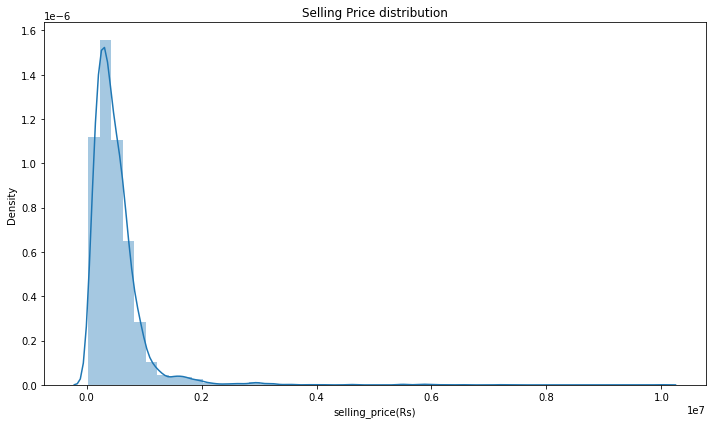

In [ ]:
# distplot of selling price , so that we come to know how is our target looking

plt.figure(figsize=(10,6))
sns.distplot(df_cardekho['selling_price(Rs)'])
plt.title("Selling Price distribution")
plt.tight_layout()
plt.show()

**From this graph we come to know that selling price columns is right skewed and we have to fix it before sending to training model**

In [ ]:
df_cardekho['selling_price(Rs)'].describe()

count    6.105000e+03
mean     5.007468e+05
std      4.711685e+05
min      2.999900e+04
25%      2.500000e+05
50%      4.000000e+05
75%      6.250000e+05
max      1.000000e+07
Name: selling_price(Rs), dtype: float64

# Explore 50 top selling car and  brand

**First explore top 50 selling cars**

In [ ]:
top_50 = df_cardekho['name'].value_counts()[:50]
top_50

Maruti Swift Dzire VDI              108
Maruti Alto 800 LXI                  70
Maruti Alto LXi                      67
Maruti Swift VDI                     59
Maruti Alto K10 VXI                  44
Maruti Alto LX                       42
Maruti Wagon R VXI BS IV             41
Hyundai EON Era Plus                 40
Maruti Ertiga VDI                    39
Maruti Ritz VDi                      38
Maruti Swift Dzire VXI               36
Maruti 800 AC                        36
Maruti Swift Dzire VDi               33
Maruti Swift VDI BSIV                32
Hyundai EON Magna Plus               28
Maruti Wagon R LXI Minor             27
Hyundai Verna 1.6 SX                 27
Renault KWID RXT                     27
Maruti Alto 800 VXI                  26
Volkswagen Vento Diesel Highline     25
Mahindra XUV500 W6 2WD               24
Hyundai i10 Sportz                   24
Ford Figo Diesel Titanium            24
Hyundai i10 Magna                    23
Maruti Swift Dzire ZDI               23


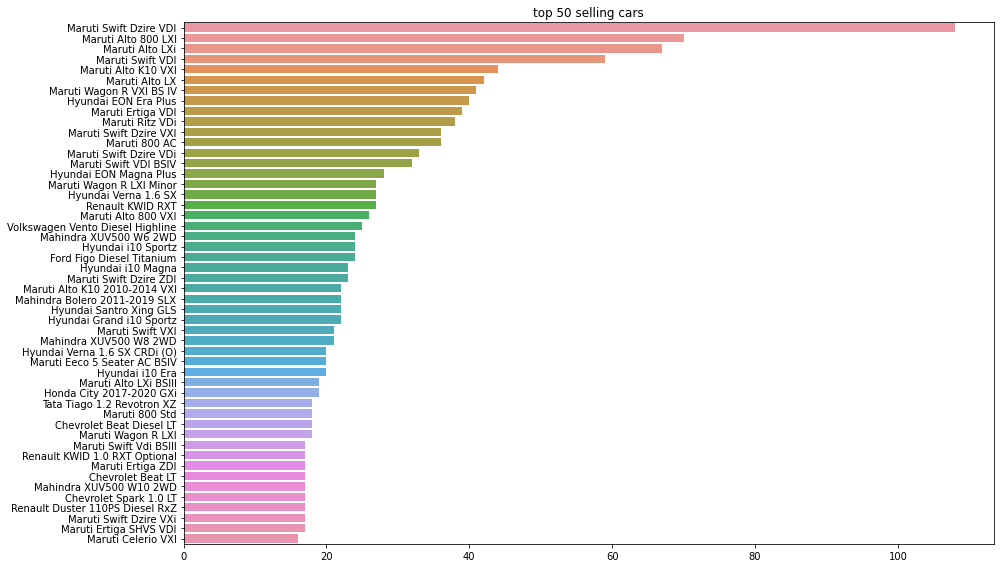

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x = top_50.values , y = top_50.index, orient='h')
plt.title('top 50 selling cars')
plt.tight_layout()
plt.show()

**From above graph we can say that the most selling car is Maruti Swift Dzire VDI **

Now Let explore top 50 brands

In [ ]:
# Add column car brand
df_cardekho['car brand'] = df_cardekho['name'].str.split().str[0]
df_cardekho.head() 

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),car brand
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0,Skoda
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0,Honda
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0,Hyundai
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0,Maruti


In [ ]:
top_50_brands = df_cardekho['car brand'].value_counts()[:50]
top_50_brands

Maruti           1922
Hyundai          1098
Mahindra          662
Tata              581
Honda             322
Ford              320
Toyota            285
Chevrolet         202
Renault           185
Volkswagen        161
Nissan             65
Skoda              62
Datsun             50
Mercedes-Benz      39
Fiat               37
Audi               30
BMW                29
Jeep               17
Mitsubishi          8
Volvo               6
Ambassador          4
Daewoo              3
MG                  3
Jaguar              3
Isuzu               3
Kia                 2
Land                2
Force               2
Ashok               1
Opel                1
Name: car brand, dtype: int64

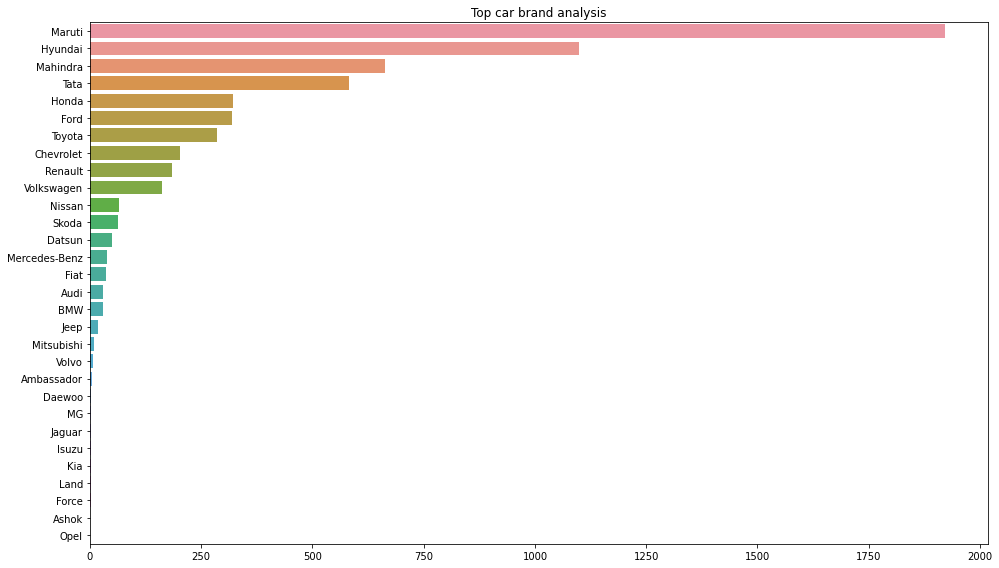

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x=top_50_brands.values, y =top_50_brands.index, orient='h')
plt.title("Top car brand analysis")
plt.tight_layout()
plt.show()

**From the above graph you can see the most selling brand is Maruti** 

Lets see the countplot of year

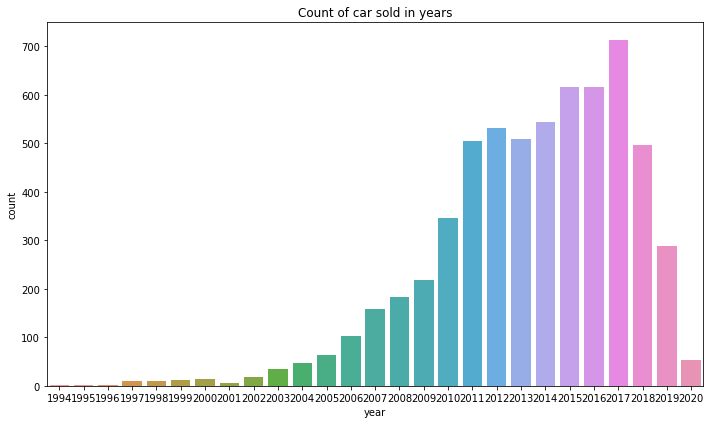

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'year',data=df_cardekho)
plt.title("Count of car sold in years")
plt.tight_layout()
plt.show()

# Univariate Analysis

In [ ]:
df_cardekho.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),car brand
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0,Skoda
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0,Honda
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0,Hyundai
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0,Maruti


two types of data we have 

categorical
  1. nominal
  2. Ordinal
  
numerical
  1. discrete
  2. continuous

**First analysis categorical data**

In [ ]:
 categorical = df_cardekho.select_dtypes(include='O').columns

In [ ]:
df_cardekho[categorical].describe()

,name,fuel,seller_type,transmission,owner,car brand
count,6105,6105,6105,6105,6105,6105
unique,1859,4,3,2,5,30
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,Maruti
freq,108,3320,5560,5640,3682,1922


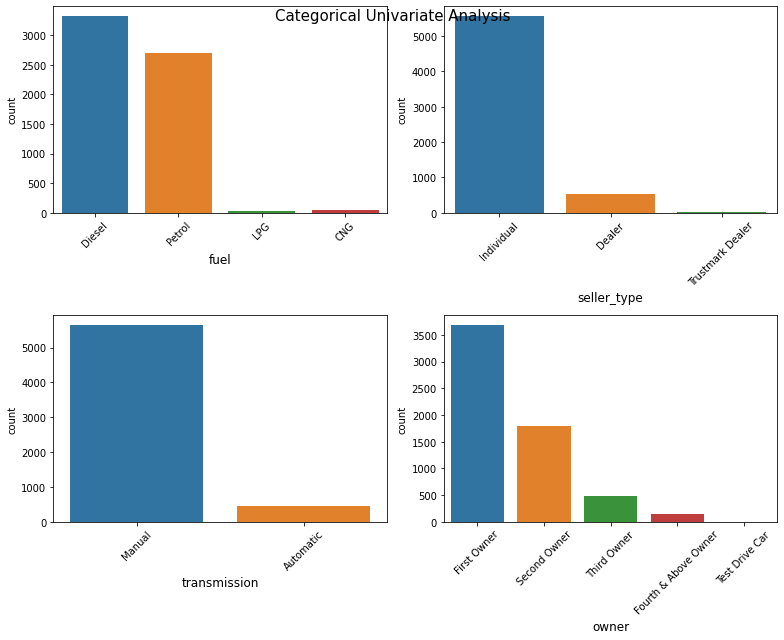

In [ ]:
plt.figure(figsize=(11,9))
plt.suptitle('Categorical Univariate Analysis',size=15)
for i in range(1,5):
  plt.subplot(2,2,i)
  sns.countplot(x=categorical[i],data = df_cardekho)
  plt.xticks(size =10 ,rotation=45)
  plt.xlabel(categorical[i],size=12)
plt.tight_layout()
plt.show()

**Numerical Univariate Analysis**

In [ ]:
numerical = df_cardekho.select_dtypes(np.number).columns

In [ ]:
df_cardekho[numerical].describe()

,year,km_driven,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
count,6105.000000,6.105000e+03,6105.000000,6105.000000,6105.000000,6105.000000,6105.000000,6.105000e+03
mean,2013.452907,7.544271e+04,19.449284,1425.311548,86.797139,5.437674,8.547093,5.007468e+05
std,3.918792,5.995855e+04,4.046244,491.132412,30.783704,0.989835,3.918792,4.711685e+05
min,1994.000000,1.000000e+00,0.000000,624.000000,32.800000,2.000000,2.000000,2.999900e+04
25%,2011.000000,4.000000e+04,16.800000,1196.000000,67.100000,5.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,19.400000,1248.000000,81.830000,5.000000,8.000000,4.000000e+05
75%,2017.000000,1.000000e+05,22.500000,1498.000000,99.000000,5.000000,11.000000,6.250000e+05
max,2020.000000,2.360457e+06,42.000000,3498.000000,400.000000,14.000000,28.000000,1.000000e+07


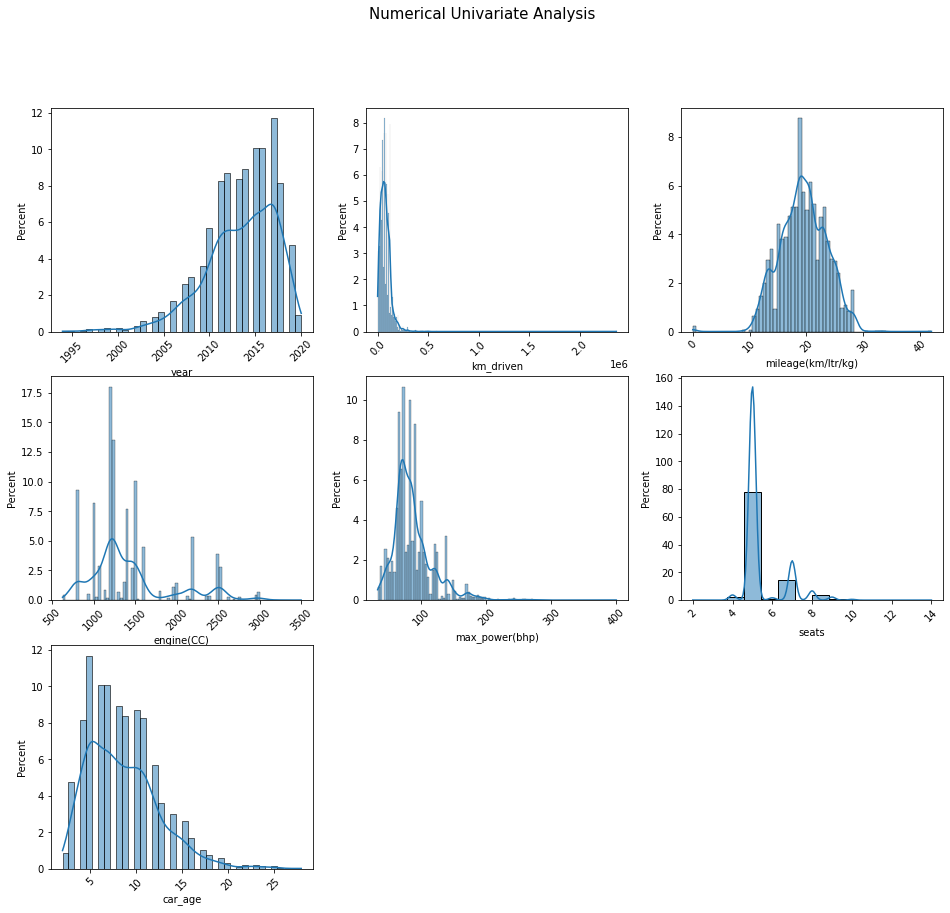

In [ ]:
plt.figure(figsize=(16,14))
plt.suptitle('Numerical Univariate Analysis',size= 15)
for i in range(7):
  plt.subplot(3,3,i+1)
  sns.histplot(df_cardekho[numerical[i]],stat = 'percent',kde=True)
  plt.xticks(size=10,rotation = 45)
  plt.xlabel(numerical[i],size= 10)
# plt.tight_layout()
plt.show()


**Handling Outliers on Unvariate Data**

There are many ways to handling outlier 

But so far I know two ways 

1. Standard Deviation 
2. Z score 

o) Handling Outlier of km_driven
 

In [ ]:
# Handling on km_driven Using standarde deviation
# Lets use 3 standard deviation 
km_mean = df_cardekho['km_driven'].mean()
km_std = df_cardekho['km_driven'].std()

lower_limit  = km_mean - 3*km_std
upper_limit = km_mean + 3*km_std
print(lower_limit,upper_limit)

-104432.9390077091 255318.35489632498


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['km_driven']<lower_limit)  | (df_cardekho['km_driven'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(44, 14)

In [ ]:
# Now lets make our km_driven column after removing this row meand removing this outlier
df_cardekho = df_cardekho[(df_cardekho['km_driven']>lower_limit)  & (df_cardekho['km_driven'] < upper_limit)]
df_cardekho.shape

(6061, 14)

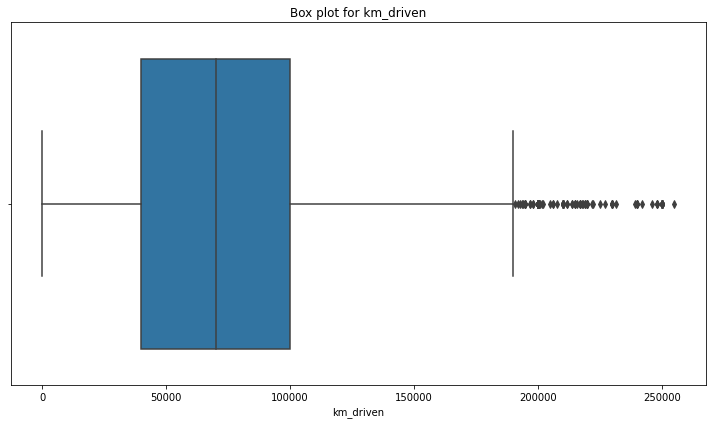

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for km_driven')
sns.boxplot(x=df_cardekho['km_driven'],data = df_cardekho)
plt.tight_layout()
plt.show()

o) Handling Outlier of engine(CC)

In [ ]:
# Handling on engine(CC) Using standarde deviation
# Lets use 3 standard deviation 
engine_mean = df_cardekho['engine(CC)'].mean()
engine_std = df_cardekho['engine(CC)'].std()

lower_limit  = engine_mean - 3*engine_std
upper_limit = engine_mean + 3*engine_std
print(lower_limit,upper_limit)

-39.59526333868348 2879.3147815699986


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['engine(CC)']<lower_limit)  | (df_cardekho['engine(CC)'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(70, 14)

In [ ]:
# Lets take all the rows which having engine value greater than lower_limit and less than upper_limit (indirectly we are removing all rows which we found above [70 rows] )
df_cardekho = df_cardekho[(df_cardekho['engine(CC)'] > lower_limit)  & (df_cardekho['engine(CC)'] < upper_limit)]
df_cardekho.shape

(5991, 14)

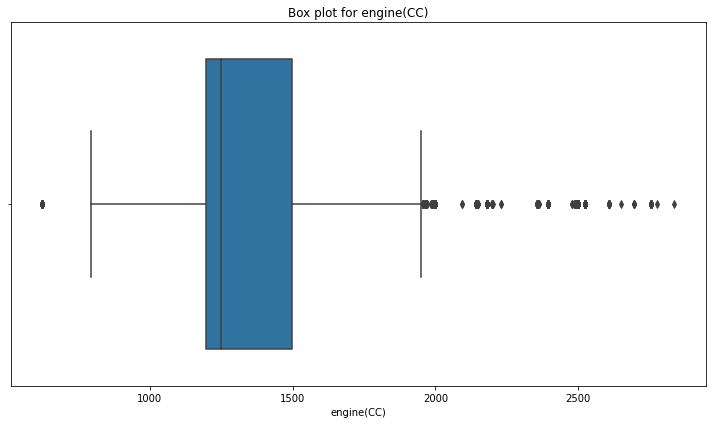

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for engine(CC)')
sns.boxplot(x=df_cardekho['engine(CC)'],data = df_cardekho)
plt.tight_layout()
plt.show()

**Handling Outlier of mileage**

In [ ]:
# Handling on mileage Using standarde deviation
# Lets use 3 standard deviation 
mileage_mean = df_cardekho['mileage(km/ltr/kg)'].mean()
mileage_std = df_cardekho['mileage(km/ltr/kg)'].std()

lower_limit  = mileage_mean - 3*mileage_std
upper_limit = mileage_mean + 3*mileage_std
print(lower_limit,upper_limit)

7.608276400791667 31.517108342990674


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['mileage(km/ltr/kg)']<lower_limit)  | (df_cardekho['mileage(km/ltr/kg)'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(18, 14)

In [ ]:
# Lets take all the rows which having engine value greater than lower_limit and less than upper_limit (indirectly we are removing all rows which we found above [70 rows] )
df_cardekho = df_cardekho[(df_cardekho['mileage(km/ltr/kg)'] > lower_limit)  & (df_cardekho['mileage(km/ltr/kg)'] < upper_limit)]
df_cardekho.shape

(5973, 14)

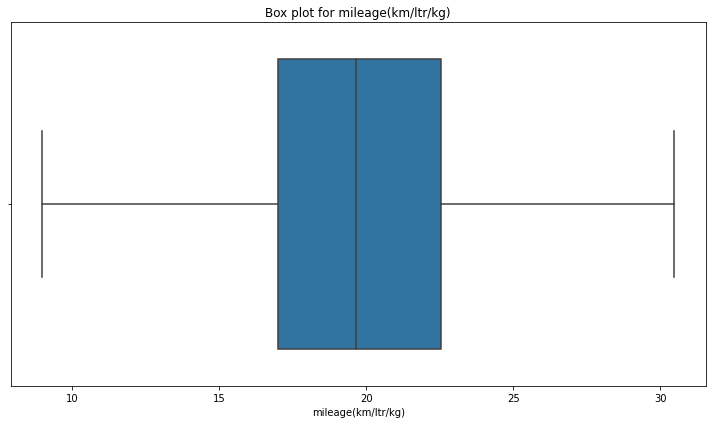

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for mileage(km/ltr/kg)')
sns.boxplot(x=df_cardekho['mileage(km/ltr/kg)'],data = df_cardekho)
plt.tight_layout()
plt.show()

** Handling Outliers of max_power(bhp)**

In [ ]:
# Handling on max_power(bhp) Using standarde deviation
# Lets use 3 standard deviation 
max_power_mean = df_cardekho['max_power(bhp)'].mean()
max_power_std = df_cardekho['max_power(bhp)'].std()

lower_limit  = max_power_mean - 3*max_power_std
upper_limit = max_power_mean + 3*max_power_std
print(lower_limit,upper_limit)

1.1355786389399043 170.06111146653473


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['max_power(bhp)']<lower_limit)  | (df_cardekho['max_power(bhp)'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(100, 14)

In [ ]:
# Lets take all the rows which having engine value greater than lower_limit and less than upper_limit (indirectly we are removing all rows which we found above [70 rows] )
df_cardekho = df_cardekho[(df_cardekho['max_power(bhp)'] > lower_limit)  & (df_cardekho['max_power(bhp)'] < upper_limit)]
df_cardekho.shape

(5873, 14)

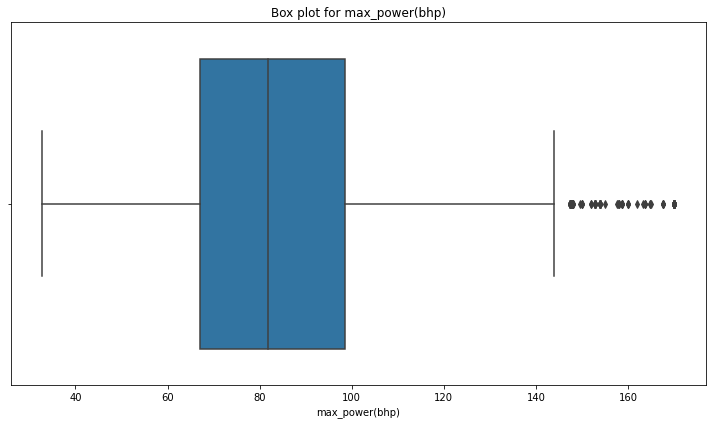

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for max_power(bhp)')
sns.boxplot(x=df_cardekho['max_power(bhp)'],data = df_cardekho)
plt.tight_layout()
plt.show()

**Handling Outliers of car_age**

In [ ]:
# Handling on car_age Using standarde deviation
# Lets use 3 standard deviation 
car_age_mean = df_cardekho['car_age'].mean()
car_age_std = df_cardekho['car_age'].std()

lower_limit  = car_age_mean - 3*car_age_std
upper_limit = car_age_mean + 3*car_age_std
print(lower_limit,upper_limit)

-3.2366024614509534 20.29432423907738


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['car_age']<lower_limit)  | (df_cardekho['car_age'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(53, 14)

In [ ]:
# Lets take all the rows which having engine value greater than lower_limit and less than upper_limit (indirectly we are removing all rows which we found above [70 rows] )
df_cardekho = df_cardekho[(df_cardekho['car_age'] > lower_limit)  & (df_cardekho['car_age'] < upper_limit)]
df_cardekho.shape

(5820, 14)

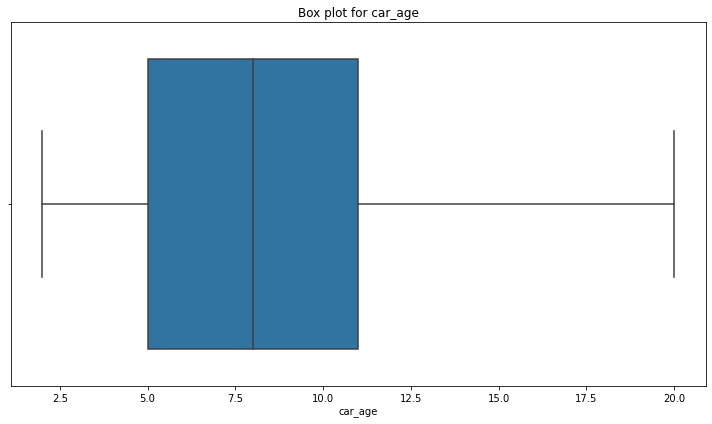

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for car_age')
sns.boxplot(x=df_cardekho['car_age'],data = df_cardekho)
plt.tight_layout()
plt.show()

**Handling Outliers of selling_price(Rs)**

In [ ]:
# Handling on selling_price(Rs) Using standarde deviation
# Lets use 3 standard deviation 
selling_price_mean = df_cardekho['selling_price(Rs)'].mean()
selling_price_std = df_cardekho['selling_price(Rs)'].std()

lower_limit  = selling_price_mean - 3*selling_price_std
upper_limit = selling_price_mean + 3*selling_price_std
print(lower_limit,upper_limit)

-485359.26751310553 1413061.0596093256


In [ ]:
# the rows which are not comming outside of this range are the outlier
df_cardekho[(df_cardekho['selling_price(Rs)']<lower_limit)  | (df_cardekho['selling_price(Rs)'] > upper_limit)].shape # these rows we have to remove to make our our curve bell shaped means graph should look like normal distribution

(93, 14)

In [ ]:
# Lets take all the rows which having engine value greater than lower_limit and less than upper_limit (indirectly we are removing all rows which we found above [70 rows] )
df_cardekho = df_cardekho[(df_cardekho['selling_price(Rs)'] > lower_limit)  & (df_cardekho['selling_price(Rs)'] < upper_limit)]
df_cardekho.shape

(5727, 14)

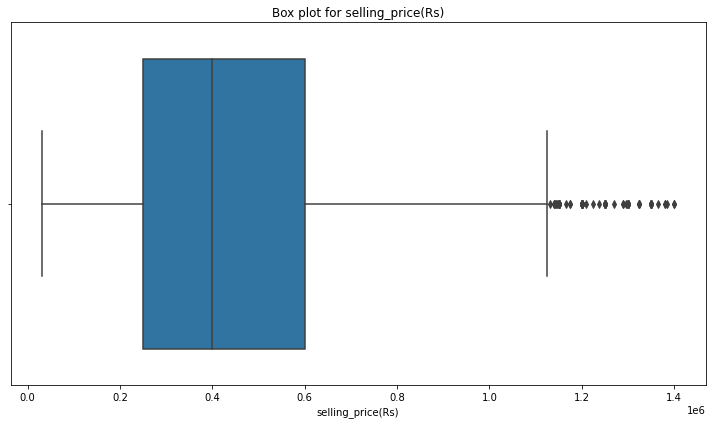

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Box plot for selling_price(Rs)')
sns.boxplot(x=df_cardekho['selling_price(Rs)'],data = df_cardekho)
plt.tight_layout()
plt.show()

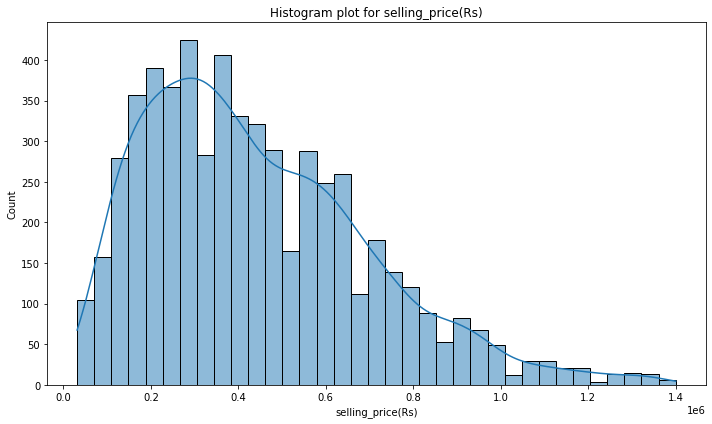

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Histogram plot for selling_price(Rs)')
sns.histplot(x=df_cardekho['selling_price(Rs)'],data = df_cardekho , kde= True)
plt.tight_layout()
plt.show()

# Bivariate Analysis

**categorical bivariate analysis**

In [ ]:
categorical = df_cardekho.select_dtypes(include='O').columns

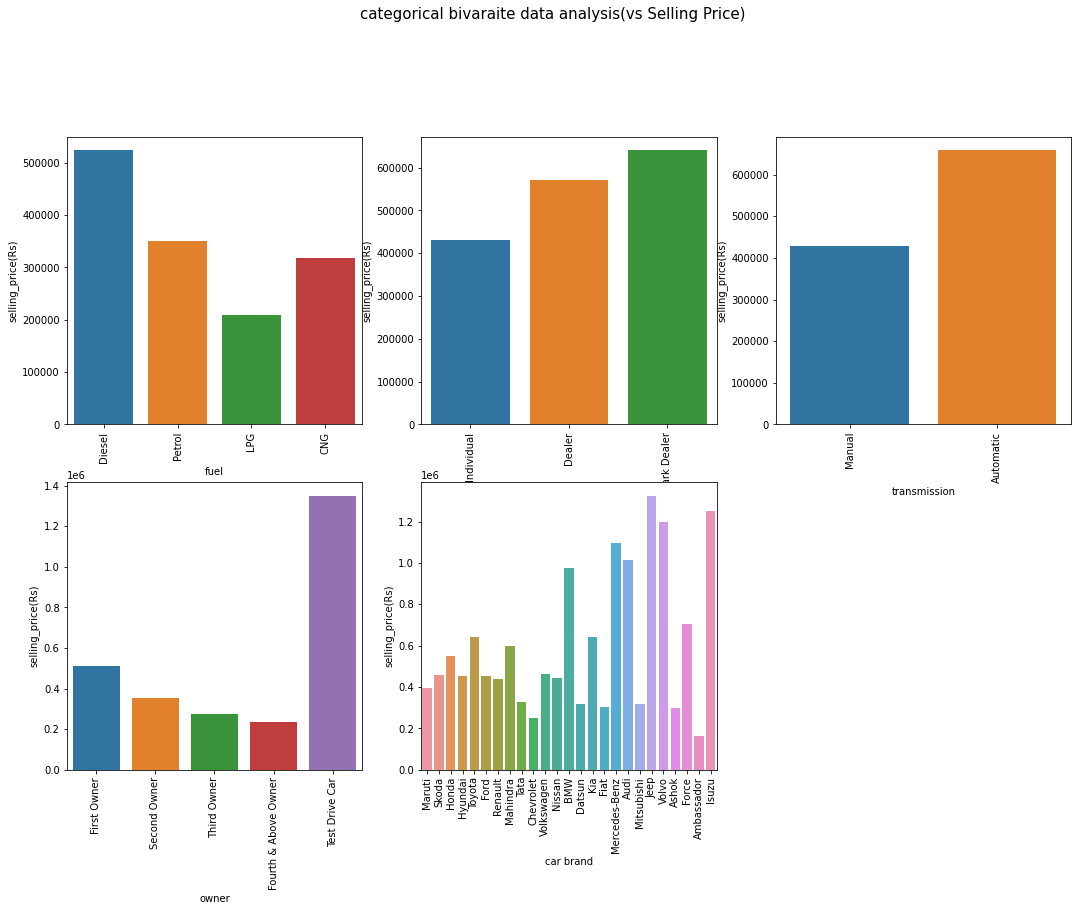

In [ ]:
plt.figure(figsize=(18,18))
plt.suptitle("categorical bivaraite data analysis(vs Selling Price)",size=15)
for i in range(1,6): # we are not taking name subplot so start with 1 
  plt.subplot(3,3,i)
  sns.barplot(x= df_cardekho[categorical[i]] , y = df_cardekho['selling_price(Rs)'] , ci = False)
  plt.xticks(size = 10 , rotation = 90)
  plt.xlabel(categorical[i] , size= 10)
# plt.tight_layout()
plt.show()

**Numerical bivariate analysis**

In [ ]:
numerical = df_cardekho.select_dtypes(np.number).columns

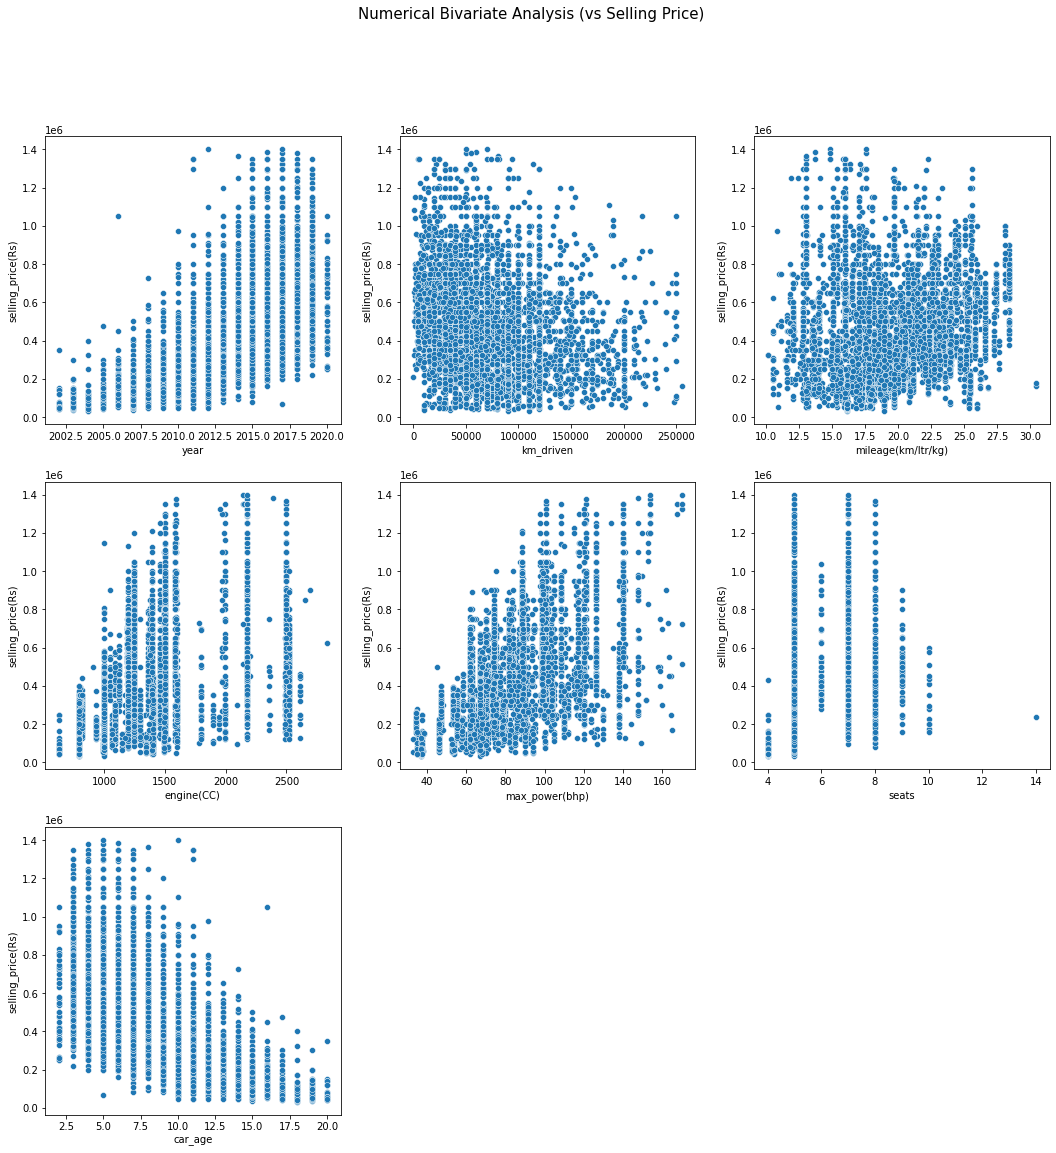

In [ ]:
plt.figure(figsize=(18,18))
plt.suptitle("Numerical Bivariate Analysis (vs Selling Price)",size= 15)
for i in range(7):
  plt.subplot(3,3,i+1)
  sns.scatterplot(x=df_cardekho[numerical[i]] , y = df_cardekho['selling_price(Rs)'])
  plt.xlabel(numerical[i],size=10)
plt.show()

# Multivariate Analysis

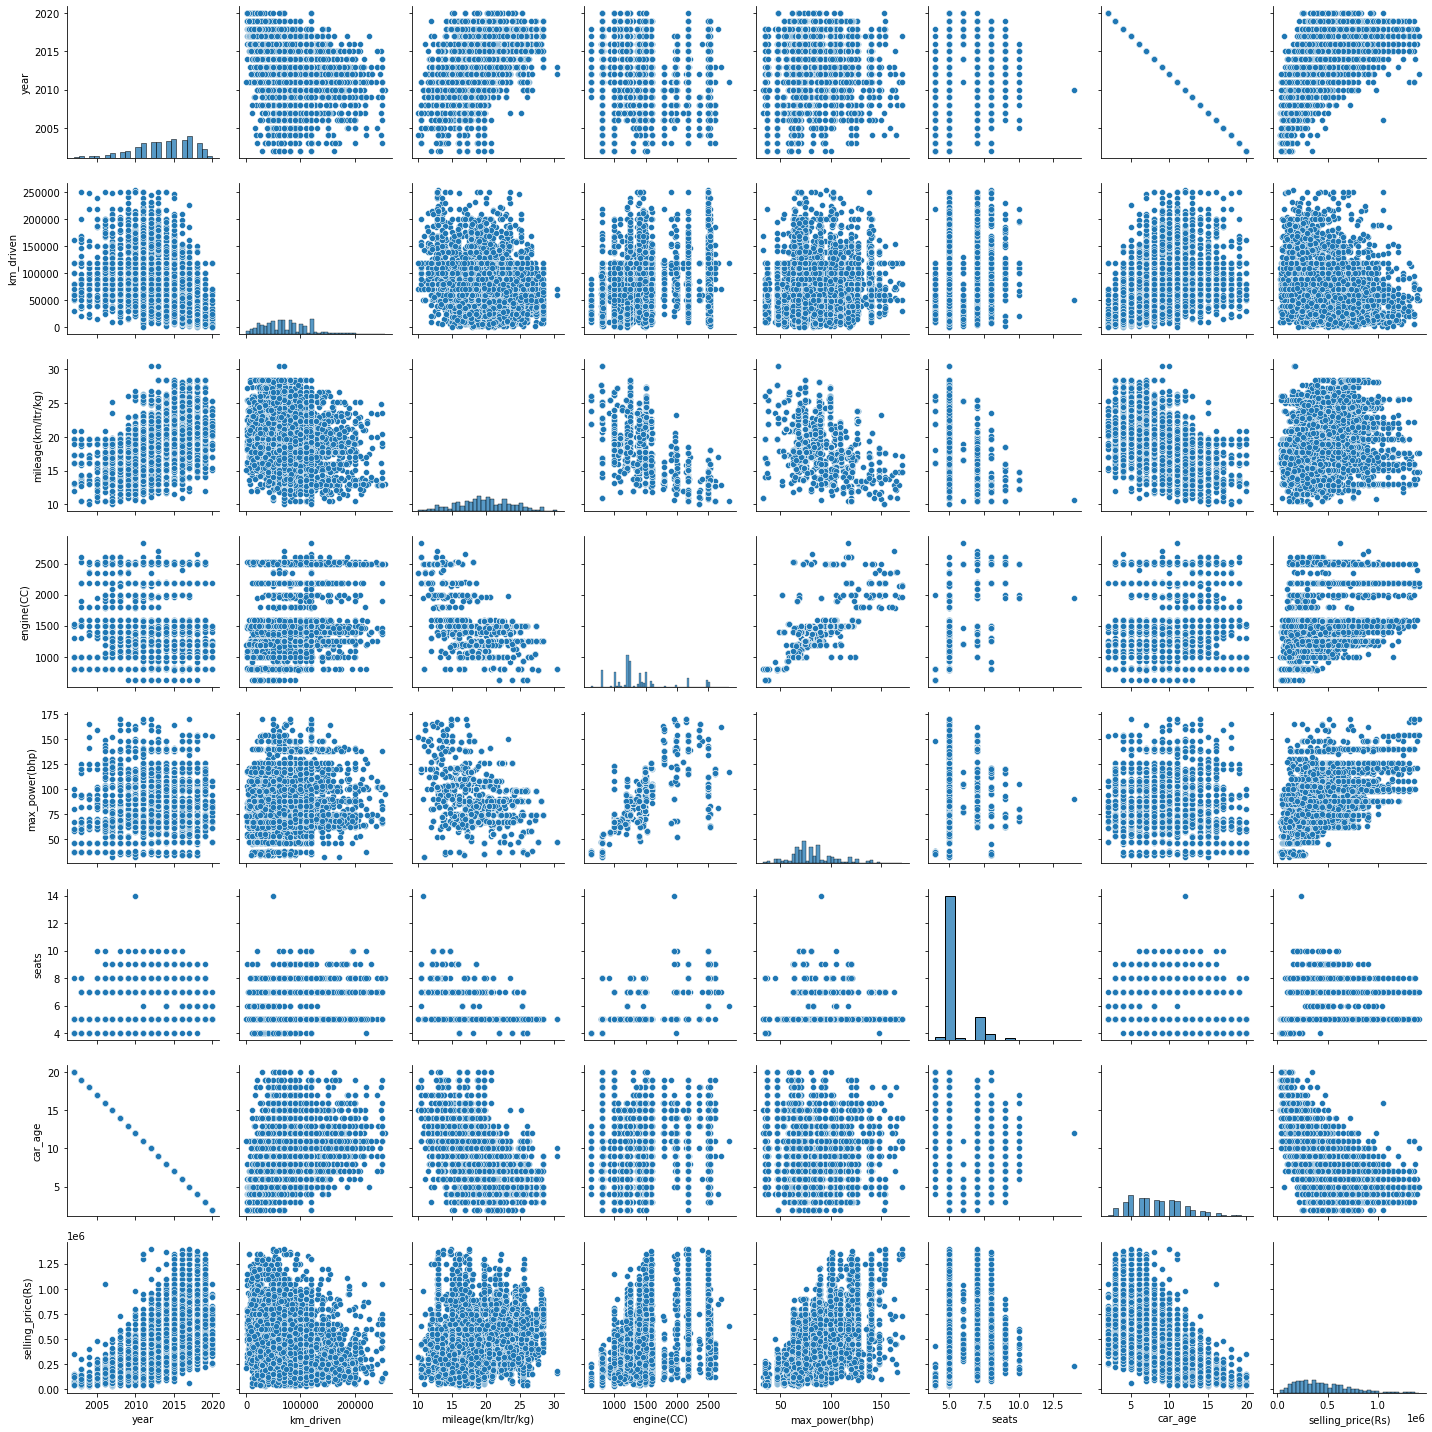

In [ ]:
sns.pairplot(df_cardekho)
plt.tight_layout()
plt.show()

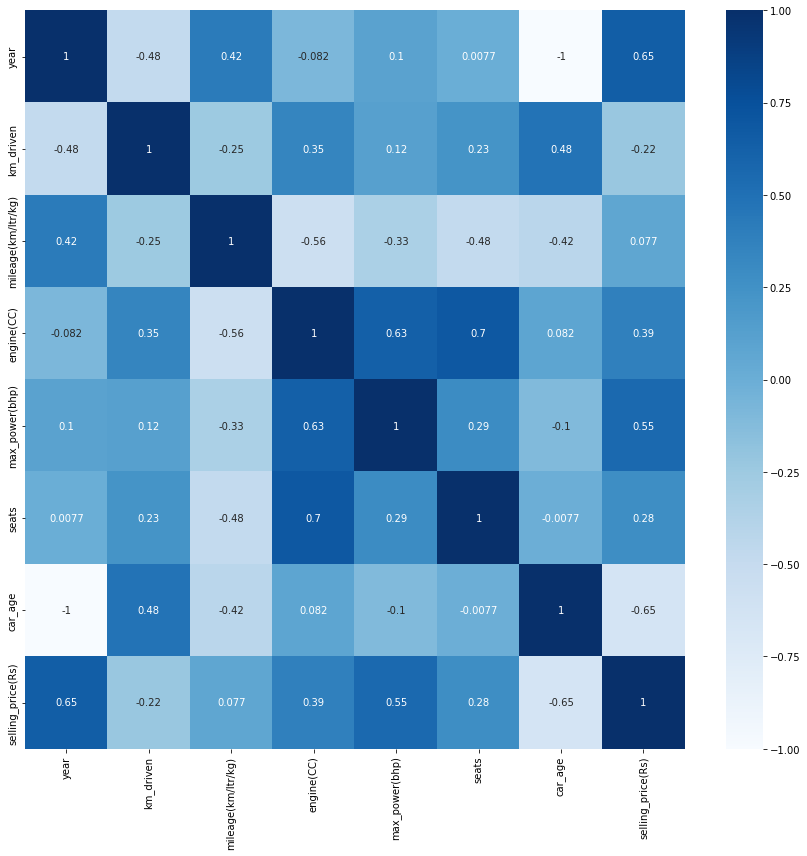

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cardekho.corr(),annot=True,cmap = 'Blues')
plt.tight_layout()
plt.show()

# Some More Preprocessing




In [ ]:
df_cardekho.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),car brand
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0,Skoda
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0,Honda
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0,Hyundai
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0,Maruti


In [ ]:
# lets make a new datafram after copying it

In [ ]:
df_main =  df_cardekho.copy()

In [ ]:
df_main.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs),car brand
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0,Maruti
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0,Skoda
2,Honda City 2017-2020 EXi,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0,Honda
3,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0,Hyundai
4,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0,Maruti


In [ ]:
df_main.drop(columns = ['name','car brand'],inplace = True)
df_main.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0
2,2006,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,16,158000.0
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0
4,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,15,130000.0


In [ ]:
df_main.year.value_counts()

2017    673
2015    600
2016    574
2014    518
2012    509
2013    485
2011    480
2018    460
2010    328
2019    264
2009    209
2008    178
2007    149
2006     98
2005     61
2004     45
2020     44
2003     35
2002     17
Name: year, dtype: int64

In [ ]:
# Lets drop all the row who are having year in between 2002 to 2009
df_main.drop(df_main[(df_main['year']<=2009 ) & ( df_main['year']>=2002)].index , axis = 0 , inplace = True)
df_main.shape

(4935, 12)

In [ ]:
df_main.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,8,450000.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,8,370000.0
3,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,12,225000.0
5,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5,5,440000.0
8,2011,90000,Diesel,Individual,Manual,First Owner,23.59,1364,67.10,5,11,350000.0


Use label encoder and change the data of (year,fuel,seller_type,'transmission,'owner') 

In [ ]:
from sklearn.preprocessing import LabelEncoder
label  = LabelEncoder()

df_main['seller_type'] = label.fit_transform(df_main['seller_type'])
df_main['year'] = label.fit_transform(df_main['year'])
df_main['fuel'] = label.fit_transform(df_main['fuel'])
df_main['transmission'] = label.fit_transform(df_main['transmission'])
df_main['owner'] = label.fit_transform(df_main['owner'])

In [ ]:
df_main

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age,selling_price(Rs)
0,4,145500,1,1,1,0,23.40,1248,74.00,5,8,450000.0
1,4,120000,1,1,1,2,21.14,1498,103.52,5,8,370000.0
3,0,127000,1,1,1,0,23.00,1396,90.00,5,12,225000.0
5,7,45000,3,1,1,0,20.14,1197,81.86,5,5,440000.0
8,1,90000,1,1,1,0,23.59,1364,67.10,5,11,350000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8118,3,25000,3,1,1,0,18.50,1197,82.85,5,9,380000.0
8119,7,80000,3,1,1,0,20.51,998,67.04,5,5,360000.0
8121,3,50000,3,1,1,2,18.90,998,67.10,5,9,260000.0
8122,4,80000,1,1,1,2,22.54,1396,88.73,5,8,475000.0


# Split data for training and testing

In [ ]:
X = df_main.drop(columns = ['selling_price(Rs)'] , axis = 1)
Y = df_main['selling_price(Rs)']
print(X.shape)
print(Y.shape)

(4935, 11)
(4935,)


In [ ]:
from sklearn.model_selection import train_test_split

train_X , test_X , train_Y , test_Y = train_test_split(X,Y,test_size = 0.2, random_state=30)

print(train_X.shape, test_X.shape)
print(train_Y.shape,test_Y.shape)

(3948, 11) (987, 11)
(3948,) (987,)


# Lets do normalization on X dataset(for knowledge only)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mmscaler = MinMaxScaler()

scaled_X = mmscaler.fit_transform(train_X)

In [ ]:
scaled_X = pd.DataFrame(data = scaled_X,columns= train_X.columns)
scaled_X.head()

,year,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine(CC),max_power(bhp),seats,car_age
0,0.5,0.156859,1.000000,0.5,1.0,0.0,0.385772,0.260063,0.361516,0.166667,0.5
1,0.7,0.274507,0.333333,0.5,1.0,0.0,0.751503,0.395296,0.479592,0.166667,0.3
2,0.0,0.470586,0.333333,0.5,1.0,0.5,0.285571,0.393035,0.562682,0.166667,1.0
3,0.4,0.164703,1.000000,0.5,0.0,0.0,0.070140,0.439168,0.640671,0.166667,0.6
4,0.5,0.460782,1.000000,0.5,1.0,0.5,0.345691,0.394844,0.615889,0.166667,0.5


# Finally, Lets train the model

**As we know that we have to predict price so we can use Regression Here**

We are going to use 

1. Linear Regression
2. Ridge Regression
3. Lasso Regression 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [ ]:
cv = []
r2_train = []
r2_test = []

In [ ]:
def model_prediction(model,model_name):
  print("Model we used " , model_name)
  model.fit(train_X,train_Y) # train the model

  # calculate train_X r2 score
  train_Y_predict = model.predict(train_X)
  r2_train_model =  r2_score(train_Y , train_Y_predict)
  r2_train.append(round(r2_train_model,2))

  # caculate test_X r2 score

  test_Y_predict = model.predict(test_X)
  r2_test_model = r2_score(test_Y,test_Y_predict)
  r2_test.append(round(r2_test_model,2))


  # R2 mean of train test using cross validation
  cross_val = cross_val_score(model,train_X,train_Y,cv =5)
  cv_mean = cross_val.mean()
  cv.append(round(cv_mean,2))

  # Printing the result
  print("r2_score of training : ",round(r2_train_model,2))
  print("r2_score of testing : ", round(r2_test_model,2))
  print("cv score of training : ",cross_val )
  print("cv mean of training  : ", round(cv_mean,2))


  # plotting the graph 


  fig,ax = plt.subplots(1,2, figsize=(10,6))

  # Residual Plot of train data
  ax[0].set_title("Residual plot of training sample")
  sns.distplot((train_Y - train_Y_predict), hist = False, ax = ax[0])
  ax[0].set_xlabel('train_Y - train_Y_predict')


  # test_Y vs test_Y_predict 
  ax[1].set_title("test_Y vs test_Y_predict")
  sns.scatterplot(test_Y,test_Y_predict)
  ax[1].set_xlabel('test_Y')
  ax[1].set_ylabel('test_Y_predict')

  plt.show()

Model we used  Linear Regression
r2_score of training :  0.71
r2_score of testing :  0.71
cv score of training :  [0.72227278 0.71672662 0.70652505 0.71066639 0.69421672]
cv mean of training  :  0.71


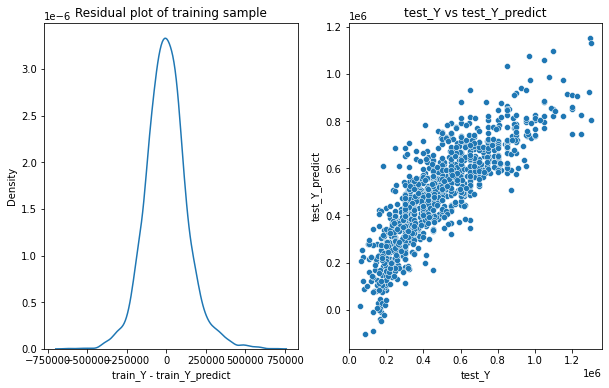

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

model_prediction(linear_regression, "Linear Regression")

Model we used  Ridge Regression
r2_score of training :  0.71
r2_score of testing :  0.71
cv score of training :  [0.72226887 0.71671738 0.70650413 0.71067299 0.6942479 ]
cv mean of training  :  0.71


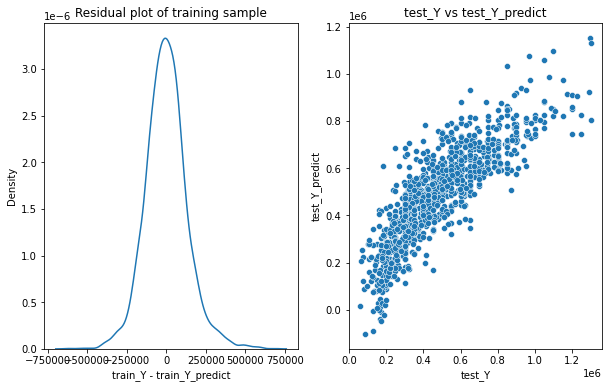

In [ ]:
from sklearn.linear_model import Ridge

ridge =  Ridge()

model_prediction(ridge, "Ridge Regression")


Model we used  Lasso Regression
r2_score of training :  0.71
r2_score of testing :  0.71
cv score of training :  [0.72227238 0.7167258  0.70652369 0.71066683 0.69421867]
cv mean of training  :  0.71


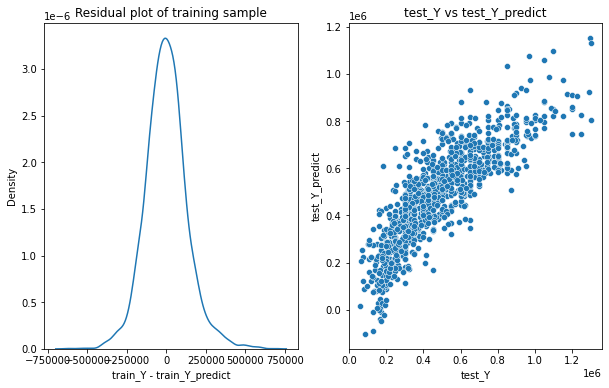

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso() 

model_prediction(lasso, "Lasso Regression")

In [ ]:
 result = pd.DataFrame({'model' : ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] ,'R square(Train)' :  r2_train, 'R square(Test)'  : r2_test,  'Cross Val score (Train)' : cv } )
 result

,model,R square(Train),R square(Test),Cross Val score (Train)
0,Linear Regression,0.71,0.71,0.71
1,Ridge Regression,0.71,0.71,0.71
2,Lasso Regression,0.71,0.71,0.71
